# Preamble

In [1]:
import $ivy.`org.http4s::http4s-ember-client:0.23.23`
import $ivy.`org.http4s::http4s-dsl:0.23.23`
import $ivy.`org.http4s::http4s-circe:1.0.0-M40`
import $ivy.`co.fs2::fs2-core:3.8.0`
import $ivy.`co.fs2::fs2-io:3.8.0`
import $ivy.`io.circe::circe-parser:0.15.0-M1`
import $ivy.`io.circe::circe-generic:0.15.0-M1`
import $ivy.`org.slf4j:slf4j-nop:2.0.9`
import $ivy.`io.circe::circe-optics:0.15.0`
import $ivy.`dev.optics::monocle-macro:3.2.0`

import $ivy.$                                        

import $ivy.$                               

import $ivy.$                                   

import $ivy.$                       

import $ivy.$                     

import $ivy.$                                 

import $ivy.$                                  

import $ivy.$                          

import $ivy.$                              

import $ivy.$                                


In [2]:
import $file.templates.preamble, preamble._

Compiling /mnt/c/Users/juanmanuel.serrano/Documents/dslcourse-lambdaworld24/templates/preamble.sc


import $file.$                 , preamble._


In [3]:
import fs2.{Pipe, Pull, Stream}
import fs2.io.net.Network
import cats.effect.{IO, Async}
import cats.effect.unsafe.IORuntime
import org.http4s.*, org.http4s.implicits._
import io.circe.Json
import io.circe.{`export` as _, Json, *}
import io.circe.parser._
import io.circe.syntax._
import io.circe.optics.JsonPath._
import org.typelevel.log4cats.LoggerFactory
import org.typelevel.log4cats.slf4j.Slf4jFactory
given LoggerFactory[IO] = Slf4jFactory.create[IO]
import cats.effect.unsafe.implicits.global

import fs2.{Pipe, Pull, Stream}

import fs2.io.net.Network

import cats.effect.{IO, Async}

import cats.effect.unsafe.IORuntime

import org.http4s.*, org.http4s.implicits._

import io.circe.Json

import io.circe.{`export` as _, Json, *}

import io.circe.parser._

import io.circe.syntax._

import io.circe.optics.JsonPath._

import org.typelevel.log4cats.LoggerFactory

import org.typelevel.log4cats.slf4j.Slf4jFactory

given_LoggerFactory_IO: LoggerFactory[org.typelevel.log4cats.LoggerFactory[[A >: scala.Nothing <: scala.Any] => cats.effect.IO[A]]] = <given>
import cats.effect.unsafe.implicits.global


# $1^{st}$ step: fixed domain implementation

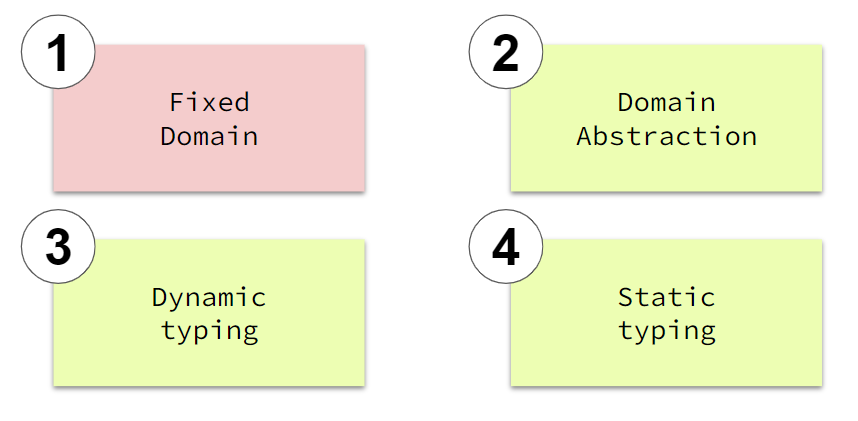

### Goals

* Understand the difference between *deep* and *surface* syntax.
* Be able to contrast *deep* syntax with *built-in functions*.
* Provide a pragmatic approach to the initial steps in designing your language.


# Ad-hoc implementation

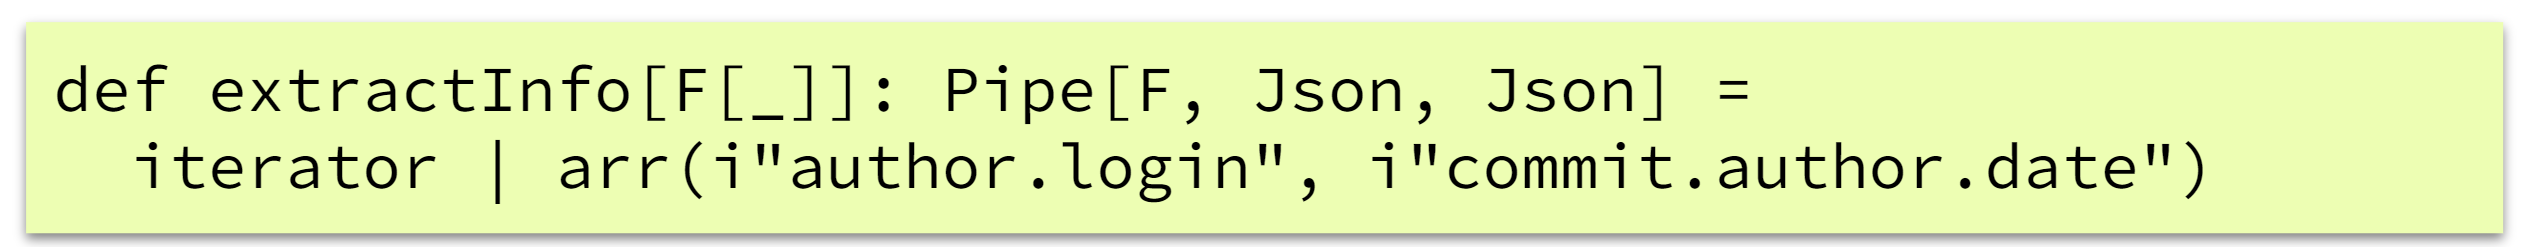

Check out the [fs2 API](https://www.javadoc.io/doc/co.fs2/fs2-docs_2.13/latest/fs2/Stream.html)!

#### [.[] | .author](https://jqplay.org/s/ApYvPesZWU8qwF-)

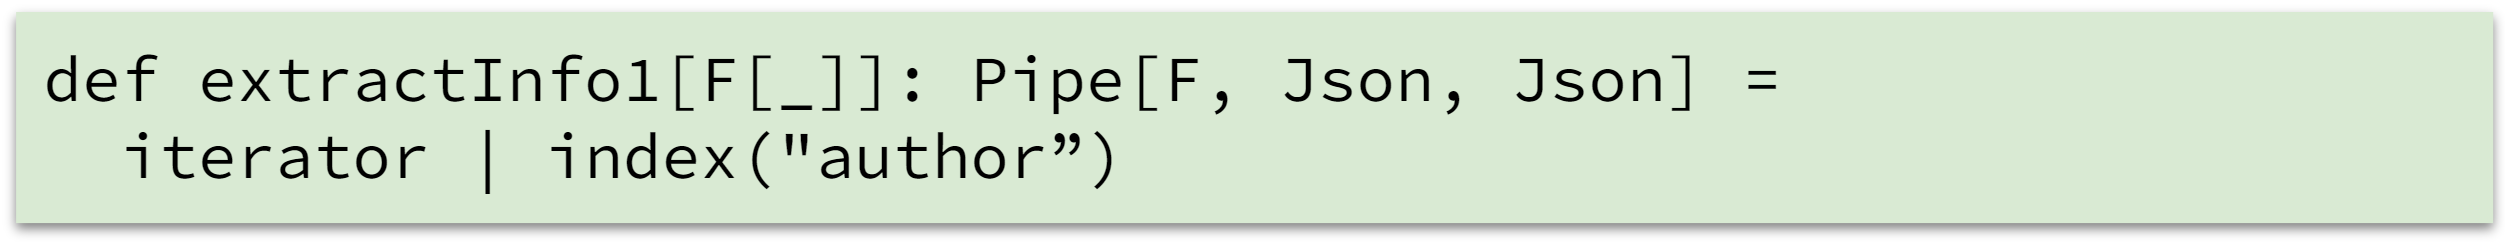

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

    def index[F[_]](k: String): Filter[F] =
        _ map:
            case IsObject(obj) => obj(k).getOrElse(Json.Null)
            case _ => Json.Null

In [ ]:
import Jq_Fs2._

In [ ]:
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    iterator | index("author")

In [ ]:
def commitInfoResults[F[_]: Async: Network: LoggerFactory]: Stream[F, Json] = 
    allCommitPages("https://api.github.com/repos/hablapps/doric")
        .through(extractInfo)

In [ ]:
commitInfoResults[IO].take(2).run

#### Exercise
<div class="alert alert-info">
    Implement the Jq-scala program equivalent to the following jq program: <code>.[] | .author | .login</code>
</div>    



##### [.[] | .author | .login](https://jqplay.org/s/b1mOn_Sg-zQ8BfT)

##### Solution

In [ ]:
def extractInfo2[F[_]]: Pipe[F, Json, Json] = 
    iterator | index("author") | index("login")

##### Your solution

In [ ]:
// Write your solution here
def extractInfo2[F[_]]: Pipe[F, Json, Json] = 
    ??? 

In [ ]:
// Test it!
allCommitPages[IO]("https://api.github.com/repos/hablapps/doric")
    .through(extractInfo2)
    .take(10)
    .run

#### [.[] | .author.login](https://jqplay.org/s/QnTcR78W8CuJ7hZ)

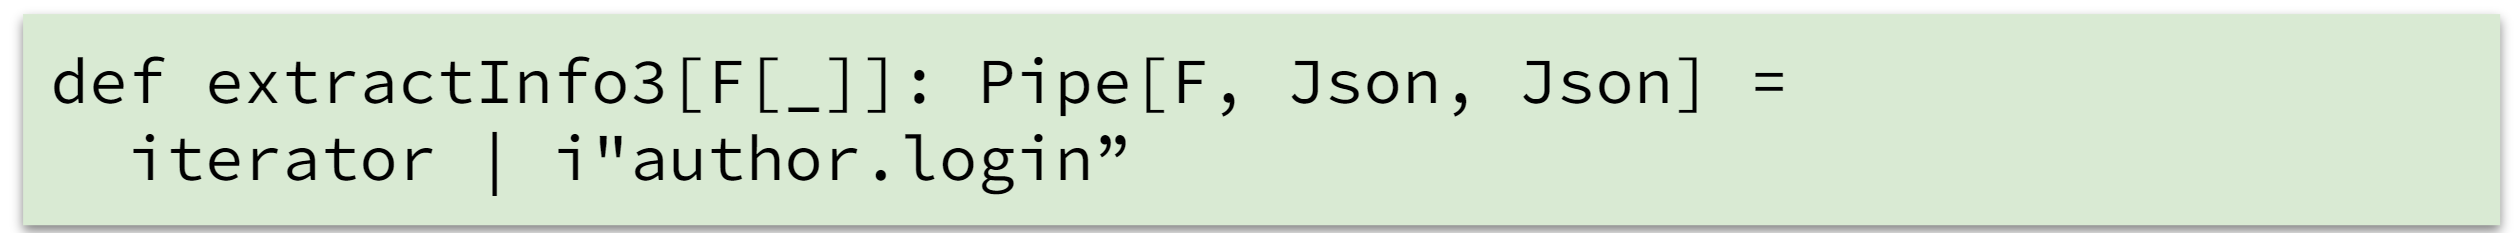

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

    def index[F[_]](k: String): Filter[F] =
        _ map:
            case IsObject(obj) => obj(k).getOrElse(Json.Null)
            case _ => Json.Null

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(index[F]).reduce(_ | _)

In [ ]:
import Jq_Fs2._

In [ ]:
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    iterator | i"author.login"

In [ ]:
def commitInfoResults[F[_]: Async: Network: LoggerFactory]: Stream[F, Json] = 
    allCommitPages("https://api.github.com/repos/hablapps/doric")
        .through(extractInfo)

In [ ]:
commitInfoResults[IO].take(2).run

#### Exercise
<div class="alert alert-info">
    Extend the Jq_Fs2 module with a new combinator that allows us to write the following program: <code>.[] | [.author.login, .commit.author.date]</code>
</div>    



##### Solution

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

    def index[F[_]](k: String): Filter[F] =
        _ map:
            case IsObject(obj) => obj(k).getOrElse(Json.Null)
            case _ => Json.Null

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(index[F]).reduce(_ | _)

    def arr[F[_]](filters: Filter[F]*): Filter[F] =
        ???

In [ ]:
import Jq_Fs2._ 

In [ ]:
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    iterator | arr(i"author.login", i"commit.author.date")

##### Your solution

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

    def index[F[_]](k: String): Filter[F] =
        _ map:
            case IsObject(obj) => obj(k).getOrElse(Json.Null)
            case _ => Json.Null

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(index[F]).reduce(_ | _)

    // new signatures here


In [ ]:
import Jq_Fs2._

In [ ]:
// .[] | [.author.login, .commit.author.date]
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    ???

#### [.[] | [.author.login, .commit.author.date]](https://jqplay.org/s/RsLG7xIUQ-xwUVR)

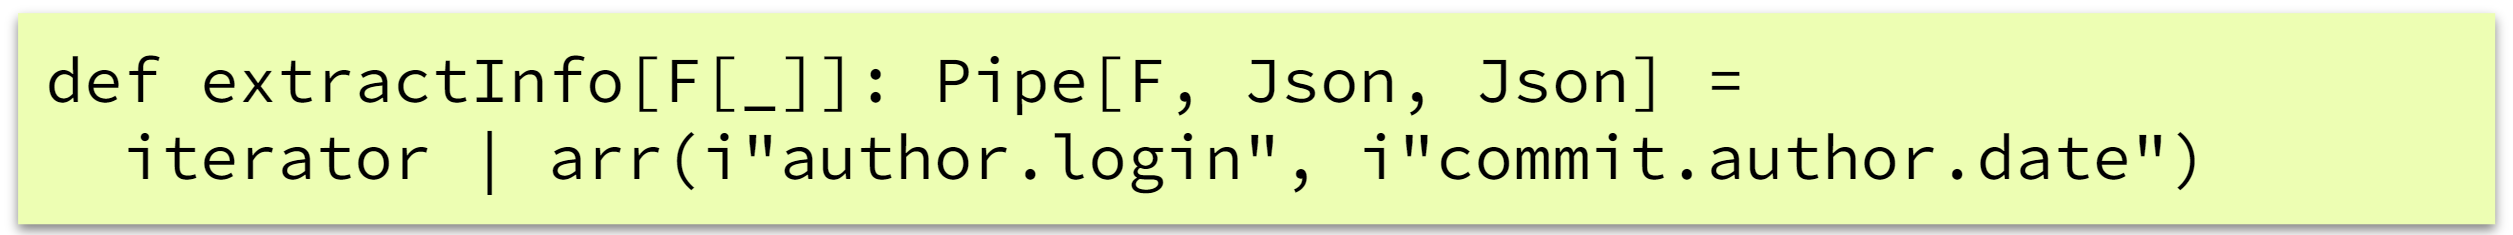

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

    def index[F[_]](k: String): Filter[F] =
        _ map:
            case IsObject(obj) => obj(k).getOrElse(Json.Null)
            case _ => Json.Null

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(index[F]).reduce(_ | _)

    def arr[F[_]](filters: Filter[F]*): Filter[F] =

        def concat(f1: Filter[F], f2: Filter[F]): Filter[F] = 
            _.flatMap: json => 
                f1(Stream(json)) ++ f2(Stream(json))

        _ flatMap: json => 
            filters.reduce(concat)(Stream(json))
                .fold(List[Json]())(_ :+ _)
                .map(Json.arr)

In [ ]:
import Jq_Fs2._ 

In [ ]:
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    iterator | arr(i"author.login", i"commit.author.date")

In [ ]:
def commitInfoResults[F[_]: Async: Network: LoggerFactory]: Stream[F, Json] = 
    allCommitPages("https://api.github.com/repos/hablapps/doric")
        .through(extractInfo)

In [ ]:
commitInfoResults[IO].take(2).run

# Deep vs. surface syntax

We’ve already encountered some examples of syntactic sugar, but there’s much more to explore!

<div>
    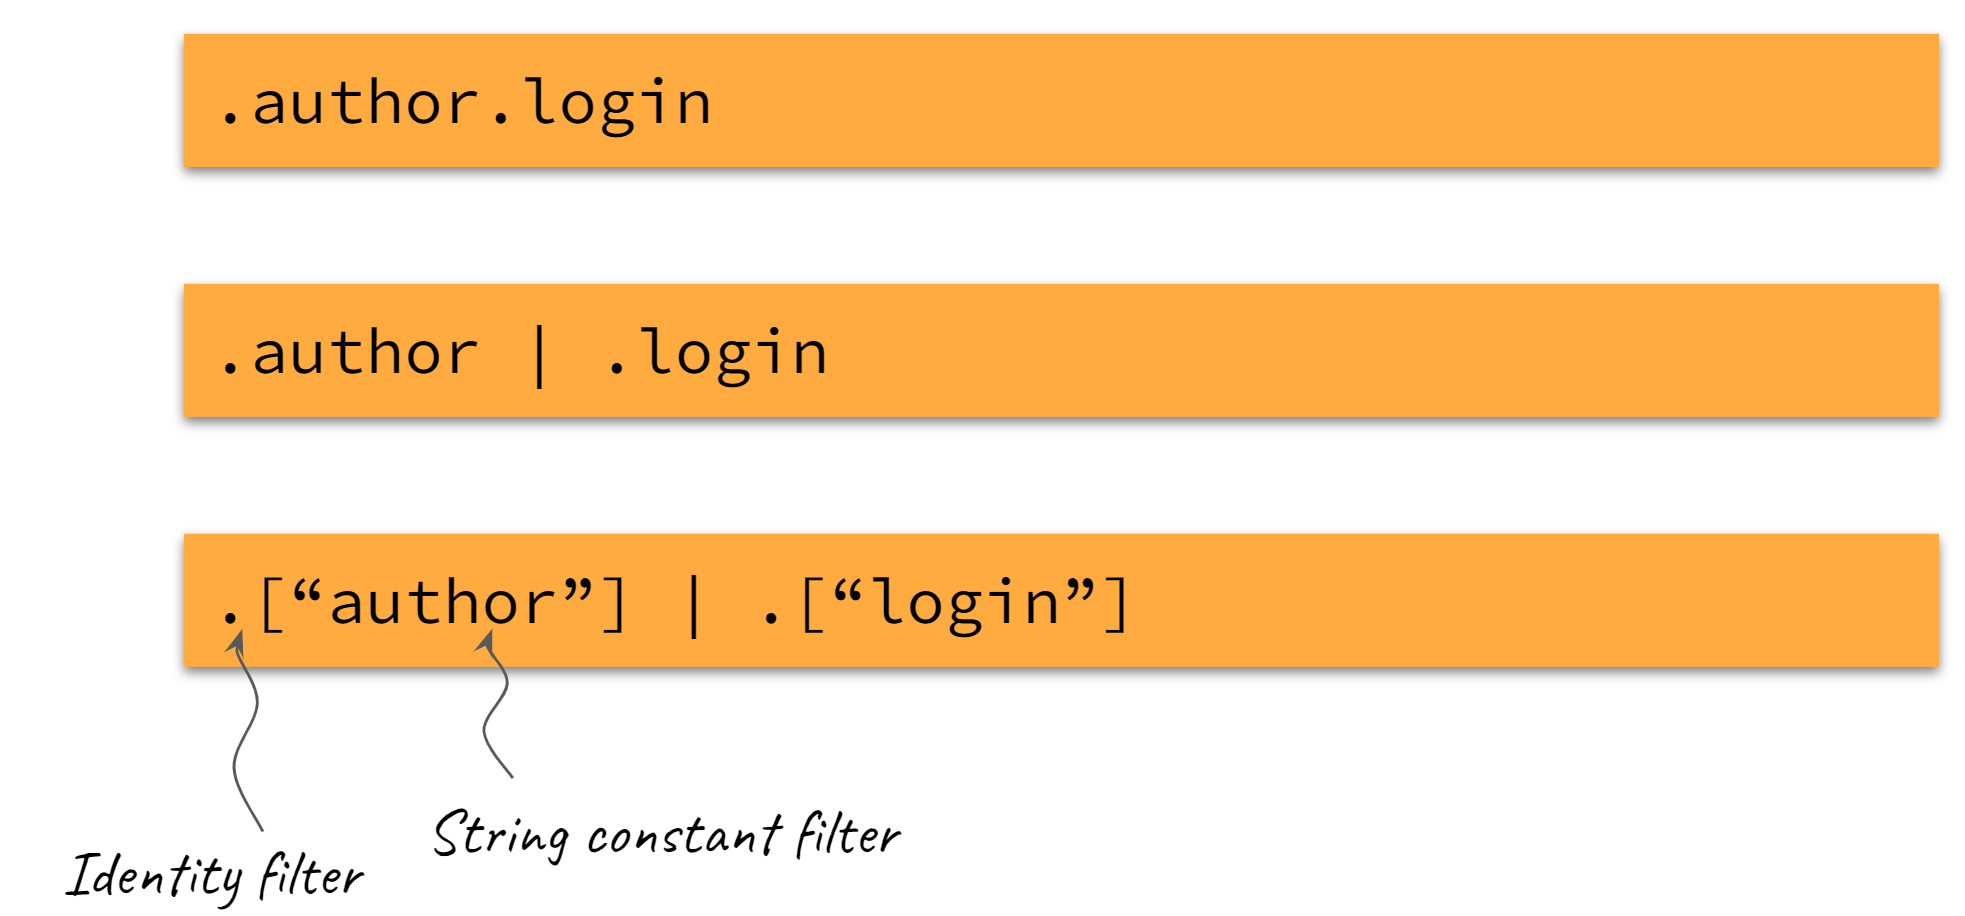
</div>

#### DEEP SYNTAX

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def id[F[_]]: Filter[F] = 
        identity[Stream[F, Json]]

    def str[F[_]](s: String): Filter[F] = 
        _.map(_ => Json.fromString(s))

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

        def index(f2: Filter[F]): Filter[F] = 
               _ flatMap: v => 
                    (f1(Stream(v)) cross f2(Stream(v)))
                        .map:
                            case (IsObject(obj), IsString(key)) => 
                                obj(key).getOrElse(Json.Null)
                            case _ => Json.Null

    def arr[F[_]](filters: Filter[F]*): Filter[F] =

        def concat(f1: Filter[F], f2: Filter[F]): Filter[F] = 
            _.flatMap: json => 
                f1(Stream(json)) ++ f2(Stream(json))

        _ flatMap: json => 
            filters.reduce(concat)(Stream(json))
                .fold(List[Json]())(_ :+ _)
                .map(Json.arr)

#### SURFACE SYNTAX

In [ ]:
import Jq_Fs2._

In [ ]:
object Jq_Fs2_Sugar:

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(key => id[F].index(str(key))).reduce(_ | _)

In [ ]:
import Jq_Fs2_Sugar._

In [ ]:
def extractInfo[F[_]]: Pipe[F, Json, Json] = 
    iterator | arr(i"author.login", i"commit.author.date")

In [ ]:
def commitInfoResults[F[_]: Async: Network: LoggerFactory]: Stream[F, Json] = 
    allCommitPages("https://api.github.com/repos/hablapps/doric")
        .through(extractInfo)

In [ ]:
commitInfoResults[IO].take(2).run

#### Exercise
<div class="alert alert-info">
    Implement the program <quote>.a[][.b[]]</quote> and verify that the output matches the expected result obtained from the jq playground.
</div>

##### [.a[][.b[]]](https://jqplay.org/s/qi5HjFGcscV3mQY)

##### Solution

In [ ]:
def program1[F[_]]: Pipe[F, Json, Json] = 
    (i"a"|iterator) index (i"b"|iterator)

##### Your solution

In [ ]:
// Write your solution here


In [ ]:
// Test it!

Stream(parse("""{"a": [{"c": 3, "d": 6}, {"c": 4, "d": 7}, {"c": 5, "d": 8}], "b": ["c", "d"]}""").toOption.get)
    .through(program1[IO])
    .run == List(3, 4, 5, 6, 7, 8).map(_.asJson)

#### Exercise
<div class="alert alert-info">
    Jq does not have a built-in, comma-separated syntax for constructing arrays; instead, the comma acts as the concatenation operator. Therefore, the primitive array combinator only takes a single filter as an argument. Update the current implementation so that the variadic array combinator leverages this primitive combinator as part of the surface syntax in the embedding.
</div>

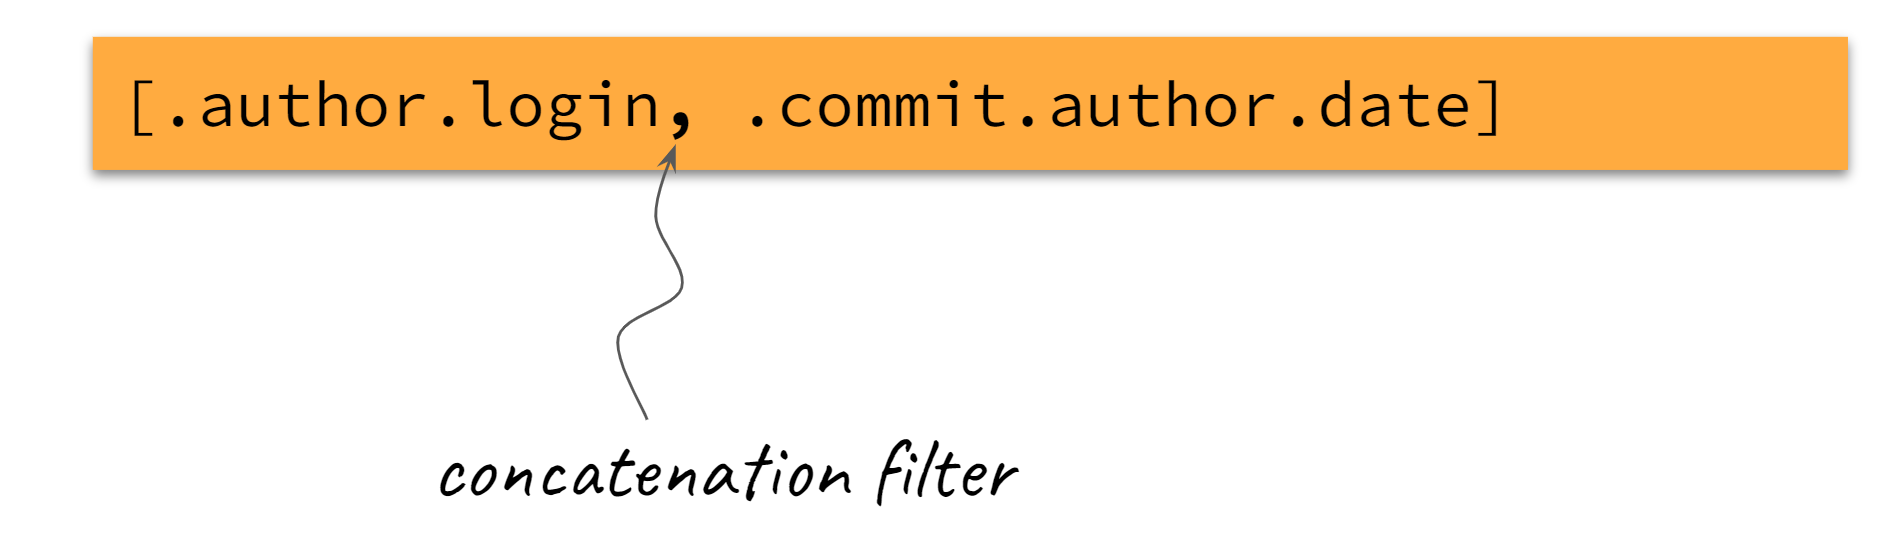

##### Solution

In [ ]:
object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def id[F[_]]: Filter[F] = 
        identity[Stream[F, Json]]

    def str[F[_]](s: String): Filter[F] = 
        _.map(_ => Json.fromString(s))

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: => Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

        def index(f2: => Filter[F]): Filter[F] = 
               _ flatMap: v => 
                    (f1(Stream(v)) cross f2(Stream(v)))
                        .map:
                            case (IsObject(obj), IsString(key)) => 
                                obj(key).getOrElse(Json.Null)
                            case _ => Json.Null

        def concat(f2: => Filter[F]): Filter[F] = 
            _.flatMap: json => 
                f1(Stream(json)) ++ f2(Stream(json))

    def array[F[_]](f: Filter[F]): Filter[F] = 
        _ flatMap: json => 
            f(Stream(json))
                .fold(List[Json]())(_ :+ _)
                .map(Json.arr)

In [ ]:
import Jq_Fs2._

In [ ]:
object Jq_Fs2_Sugar:

    import Jq_Fs2._

    def arr[F[_]](filters: Filter[F]*): Filter[F] =
        array(filters.reduce(_ concat _))

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(key => id[F].index(str(key))).reduce(_ | _)

In [ ]:
import Jq_Fs2_Sugar._

##### Your solution

In [ ]:
// DEEP SYNTAX

object Jq_Fs2: 

    type Filter[F[_]] = Pipe[F, Json, Json]

    def id[F[_]]: Filter[F] = 
        identity[Stream[F, Json]]

    def str[F[_]](s: String): Filter[F] = 
        _.map(_ => Json.fromString(s))

    def iterator[F[_]]: Filter[F] = 
        _ flatMap: 
            case IsArray(v) => Stream(v*)
            case _ => Stream(Json.Null)

    extension [F[_]](f1: Filter[F])

        def |(f2: Filter[F]): Filter[F] = 
            _ flatMap: json => 
                f1(Stream(json)).flatMap: json2 => 
                    f2(Stream(json2)) 

        def index(f2: Filter[F]): Filter[F] = 
               _ flatMap: v => 
                    (f1(Stream(v)) cross f2(Stream(v)))
                        .map:
                            case (IsObject(obj), IsString(key)) => 
                                obj(key).getOrElse(Json.Null)
                            case _ => Json.Null

    // ADD THE UNARY `array` OPERATOR HERE

    def arr[F[_]](filters: Filter[F]*): Filter[F] =

        def concat(f1: Filter[F], f2: Filter[F]): Filter[F] = 
            _.flatMap: json => 
                f1(Stream(json)) ++ f2(Stream(json))

        _ flatMap: json => 
            filters.reduce(concat)(Stream(json))
                .fold(List[Json]())(_ :+ _)
                .map(Json.arr)

In [ ]:
import Jq_Fs2._

In [ ]:
object Jq_Fs2_Sugar:

    extension (sc: StringContext)
        def i[F[_]](args: Filter[F]*): Filter[F] = 
            sc.s().split('.').map(key => id[F].index(str(key))).reduce(_ | _)

    // MOVE THE VARIADIC `arr` OPERATOR HERE


In [ ]:
import Jq_Fs2_Sugar._

# Built-in functions

Many of the most common combinators in the jq language are actually defined within jq itself, built on top of more primitive combinators. You can find the full list of built-in operators [here](https://github.com/jqlang/jq/blob/860af44fee7dcea8797daeb836a9b7c971c67e65/src/builtin.jq). For example, we can have a look to the `map` built-in operator, which applies a given filter to the elements of some array. 

#### Exercise
<div class="alert alert-info">
    Rewrite the following program using the map operator.
</div>

`.[] | .author.login`

##### Solution

`map(.author.login) | .[]`

##### Your solution

Test it in the [playground](https://jqplay.org/s/QnTcR78W8CuJ7hZ)!

#### Implementing `map`

The jq `map` operator is defined as follows:

<div>
    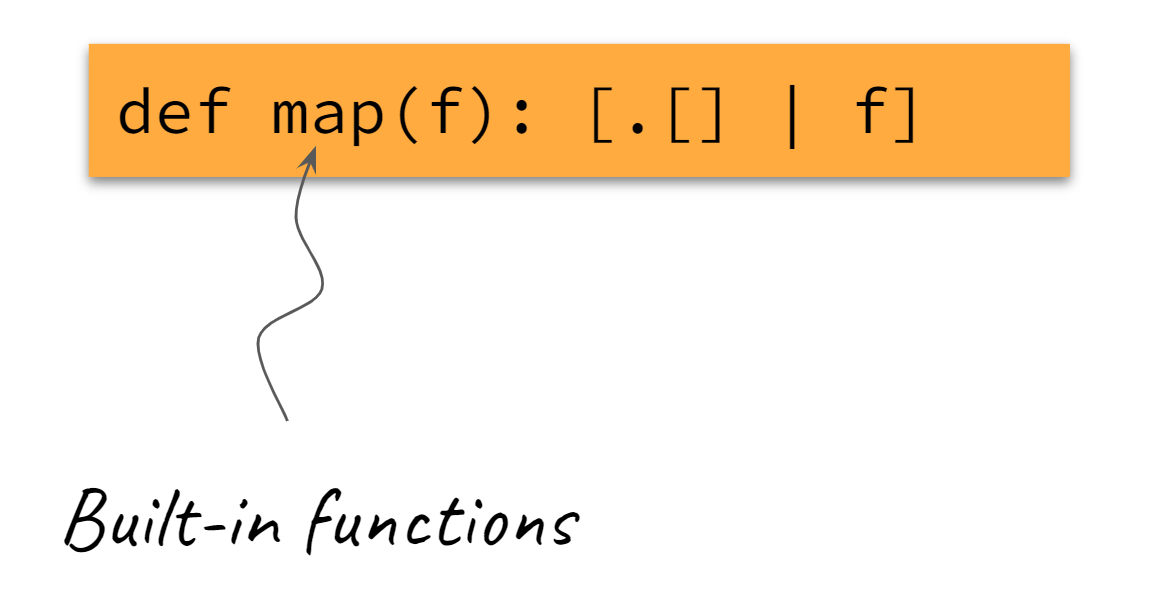
</div>

Let's implement it!

In [ ]:
object Jq_Fs2_Std: 

    def map[F[_]](f: Filter[F]): Filter[F] = 
        arr(iterator | f)
    
    /* 
        _ flatMap { 
            case IsArray(arr)  => 
                Stream(arr*)
                    .flatMap{ j => f(Stream(j)) }
                    .fold(List[Json]())(_ :+ _)
                    .map(Json.arr)
            case _ => Stream()
        }
    */


In [ ]:
import Jq_Fs2_Std._

In [ ]:
def test[F[_]: Async: Network: LoggerFactory] = 
    allCommitPages[F]("https://api.github.com/repos/hablapps/doric")
        .through(map(i"author.login"))

In [ ]:
test[IO].take(2).run

Many of the most common combinators in the jq language are actually defined within jq itself, built on top of more primitive combinators. You can find the full list of built-in operators [here](https://github.com/jqlang/jq/blob/860af44fee7dcea8797daeb836a9b7c971c67e65/src/builtin.jq). For example:

<div>
    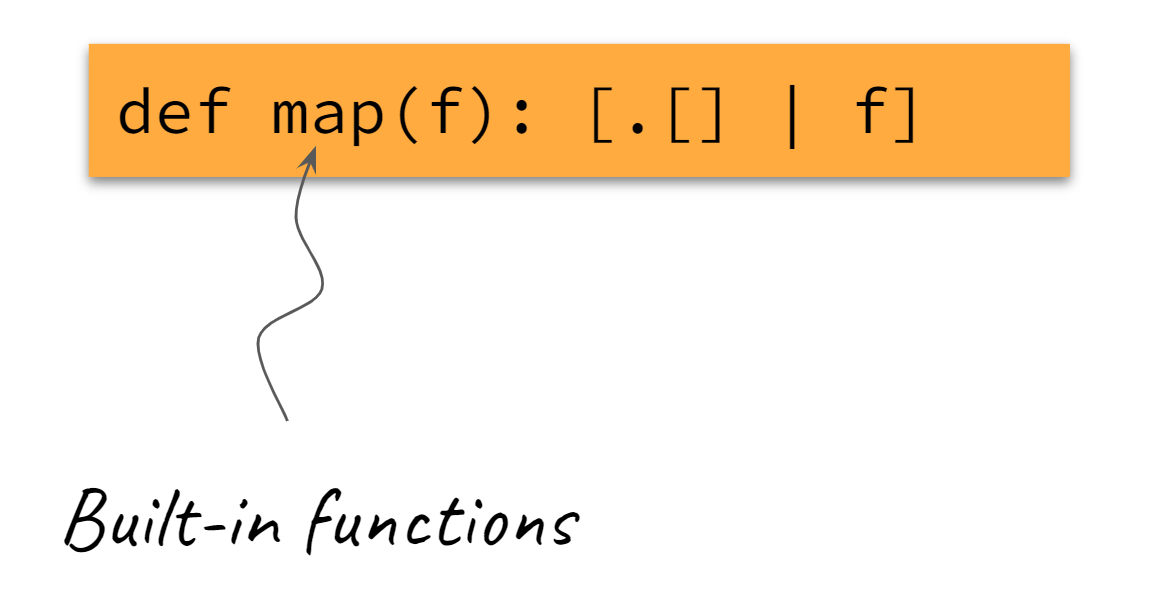
</div>

In [ ]:
object Jq_Fs2_Std: 

    def map[F[_]](f: Filter[F]): Filter[F] = 
        arr(iterator | f)
    
    /* 
    def map_adhoc(f: Filter): Filter = 
        _ flatMap { 
            case j if j.isArray => 
                Stream(j.asArray.get*)
                    .flatMap{ j => f(Stream(j)) }
                    .fold(List[Json]())(_ :+ _)
                    .map(Json.arr(_*))
            case _ => Stream()
        }
    */


In [ ]:
import Jq_Fs2_Std._

In [ ]:
def test[F[_]: Async: Network: LoggerFactory] = 
    allCommitPages[F]("https://api.github.com/repos/hablapps/doric")
        .through(map(i"author.login"))

In [ ]:
test[IO].take(2).run

#### Exercise
<div class="alert alert-info">
    Implement in jq-scala the built-in operator <code>recurse</code>, defined as follows:
</div>

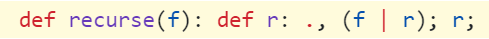

You can refer to the documentation for `recurse` in the [manual](https://jqlang.github.io/jq/manual/#recurse) and use this [example](https://jqplay.org/s/tiPDxDTnK3BHUJy) to test your implementation.

##### Solution

In [ ]:
def recurse[F[_]](f: Filter[F]): Filter[F] = 
    def r: Filter[F] = 
        id concat (f | r)
    r

##### Your solution

In [ ]:
// Write your solution here


In [ ]:
// test it!

Stream(parse("""{"foo":[{"foo": []}, {"foo":[{"foo":[]}]}]}""").toOption.get)
    .through(recurse(i"foo" | iterator)).run == 
    List(
      """{"foo":[{"foo":[]},{"foo":[{"foo":[]}]}]}""",
      """{"foo":[]}""",
      """{"foo":[{"foo":[]}]}""",
      """{"foo":[]}"""
    ).map(parse andThen (_.toOption.get))

# Limitations

What if we want a different semantics, such as Akka Streams? We would need to repeat many things, including the signatures of the primitive functions, the derived combinators, and the syntactic sugar.

In [ ]:
import $ivy.`com.typesafe.akka::akka-stream:2.8.5`

import akka.stream._
import akka.stream.scaladsl._
import akka.{ Done, NotUsed }

In [ ]:
object Jq_Akka: 

    type Filter = Flow[Json, Json, akka.NotUsed]

    /* Primitive filters */

    def id: Filter = 
        Flow[Json]

    def str(s: String): Filter = 
        Flow.fromFunction(_ => Json.fromString(s))

    def iterator: Filter = 
        ???

    extension (f1: Filter)

        def |(f2: Filter): Filter = 
            ???

        def concat(f2: Filter): Filter = 
            ???

        def index(f2: Filter): Filter = 
            ???

    def array(f: Filter): Filter = 
        ???

    /* built-in library */

    def map(f: Filter): Filter = 
        array(iterator | f)
    
    /* Syntactic sugar */

    def arr(f: Filter*): Filter = 
        array(f.reduce(_ concat _))

    extension (sc: StringContext)
        def i(args: Filter*): Filter = 
            sc.s().split('.').map(key => id.index(str(key))).reduce(_ | _)

In [ ]:
import Jq_Akka._

Also programs are mostly the same: 

In [ ]:
def extractAuthorInfo: Jq_Akka.Filter = 
    iterator | arr(i"author.login", i"commit.author.date")

The next step in the design process aims to address and solve this copy-paste problem.

### Conclusion

* _Understand the difference between *deep* and *surface* syntax._
    * Deep-syntax operators form the core of the language, while surface-syntax operators serve as convenient abbreviations defined in terms of the deep syntax.
<br/><br/>
* _Contrast *deep* syntax with *built-in functions*._
    * Built-in functions are also defined using deep syntax, but unlike surface syntax, they introduce genuinely new combinators that address recurring patterns.
<br/><br/>
* _Take a pragmatic approach to the initial steps of designing your language._
    * Start with a small set of specific programs you wish to implement. Then, identify the initial set of operators needed to accommodate these programs and differentiate between deep and surface syntax. Finally, include common operators in the built-in library.
    * Additionally, begin with the semantic domain of your choice — specifically, the one you'll work with most frequently. In the case of the jq embedding, if you're working with the fs2 library, stick to this semantic domain. You can always abstract away the semantic representation later if the need arises.



# References

* Scala 3 extension methods: https://docs.scala-lang.org/scala3/book/ca-extension-methods.html
* Conversion type class: https://docs.scala-lang.org/scala3/reference/contextual/conversions.html